# Stroke Prediction using Machine Learning

## Introduction
Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen and nutrients for its correct functioning. The other way around, the brain is not able to drain and expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in the United States. For this reason, stroke is considered a severe disease and has been the subject of extensive research, not only in the medical field but also in data science and machine learning studies.

## Dataset Description -
The dataset used in this article contains 5110 records of patients. Each patient has 12 columns each referring to a concrete attribute. Most of these attributes correspond to medical records or the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average glucose levels in the blood, and body mass index (BMI). As we can observe from these first attributes, the dataset provides relevant data regarding the likelihood of patients suffering from stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact, stroke is also an attribute in the dataset and indicates in each medical record if the patient suffered from a stroke disease or not.

In [442]:
# Importing Libraries

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_curve, accuracy_score, roc_auc_score, f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

rcParams['figure.figsize'] = 15,8
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 1. Read the dataset and view the first 10 rows of it.

In [444]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [445]:
df.drop('id',axis = 1, inplace=True)

# 2. Check the shape/dimension of the dataset

In [446]:
df.shape

(5110, 11)

In [447]:
df.ndim

2

In [448]:
# Dataset Consist of 5110 rows and 12 columns

# 3. Check for the missing values. Display number of missing values per column.

In [449]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [450]:
df.isnull().sum()*100/len(df)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [451]:
#There are 3.93% null values are present in 'bmi' column.

# 4. Investigate and predict the missing BMI Value 

In [452]:
# BMI column consist null values

In [453]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [454]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [455]:
df['bmi'].skew()

1.0553402052962912

In [456]:
df['bmi'].median()

28.1

In [457]:
# skewness of BMI column is more than 0.5.

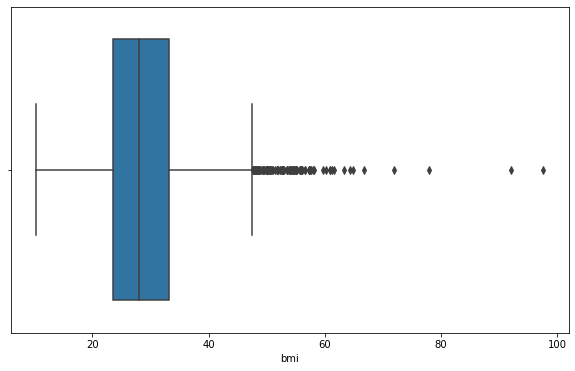

In [458]:
plt.figure(figsize = (10,6))
sns.boxplot(df['bmi'])
plt.show()

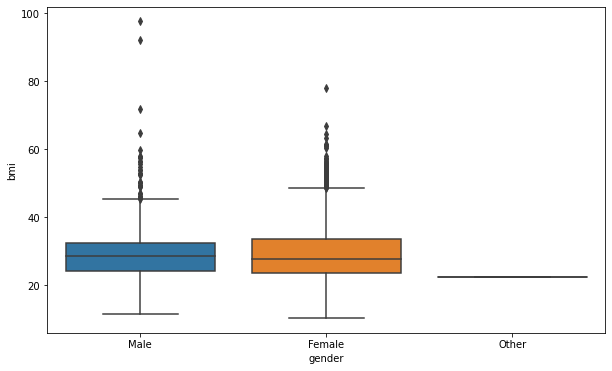

In [459]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['gender'],y = df['bmi'])
plt.show()

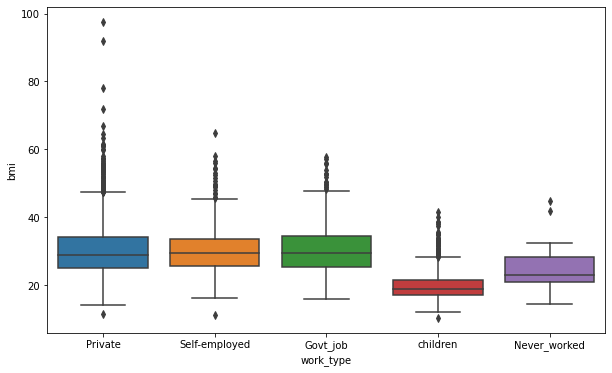

In [460]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['work_type'],y = df['bmi'])
plt.show()

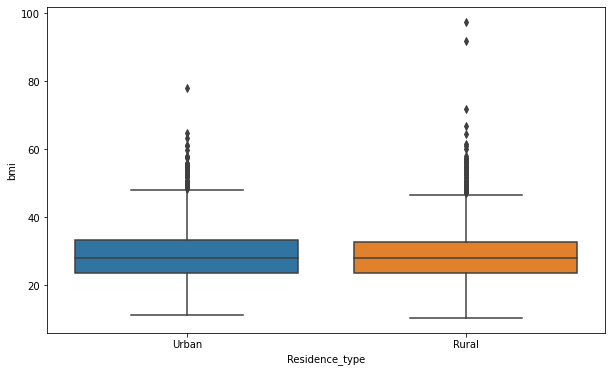

In [461]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['Residence_type'],y = df['bmi'])
plt.show()

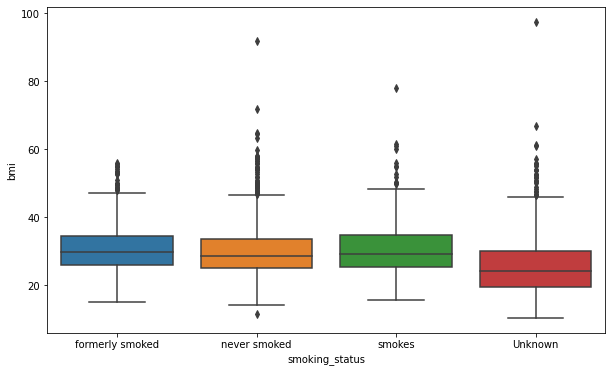

In [462]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['smoking_status'],y = df['bmi'])
plt.show()

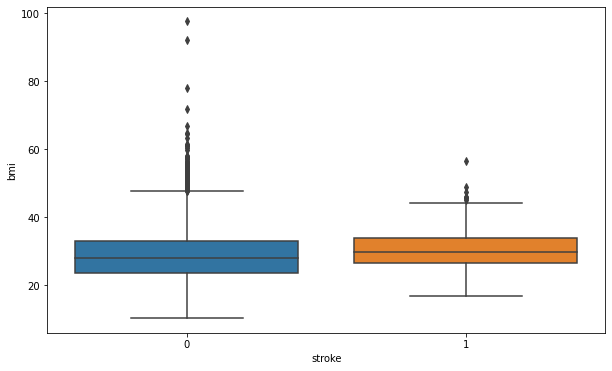

In [463]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['stroke'],y = df['bmi'])
plt.show()

In [464]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [465]:
df['bmi'].replace(np.NaN,df['bmi'].median(),inplace = True)

In [466]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [467]:
# Null value from the 'BMI' column are replaced with the median values

# 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [469]:
# Above Statistics summary shows the data type of each column along with the number of non null values.

# 6. Check the descriptive statistics of the dataset

In [470]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 7. Visualize the proportion of Stroke samples in the dataset

In [471]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [472]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

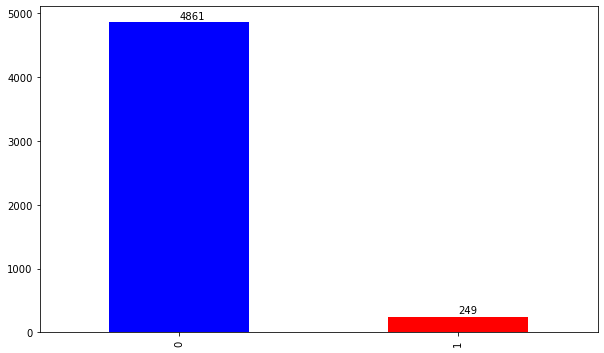

In [473]:
plt.figure(figsize = (10,6))
df['stroke'].value_counts().plot(kind = 'bar',color=['b','r'])
plt.text(x = 0,y = 4900, s = len(df[df['stroke']==0]))
plt.text(x = 1,y = 300, s = len(df[df['stroke']==1]))
plt.show()

In [474]:
df['stroke'].value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [475]:
# Stroke sample consist two value [0 , 1]
# 95.12% value lies in class 0
# while 4.87% value lies in class 1

# 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

In [476]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

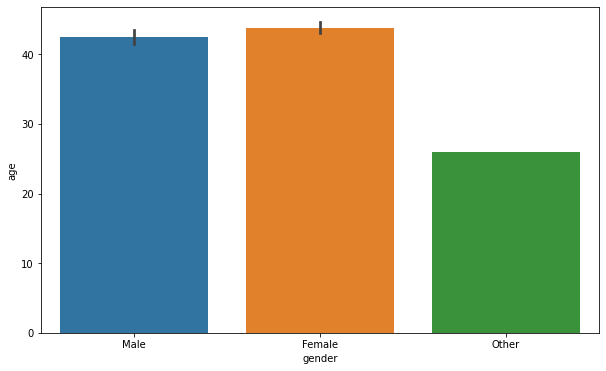

In [477]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['gender'],y = df['age'])
plt.show()

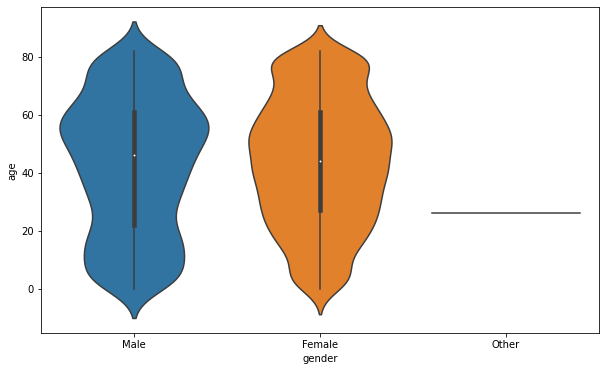

In [478]:
plt.figure(figsize = (10,6))
sns.violinplot(x = df['gender'],y = df['age'])
plt.show()

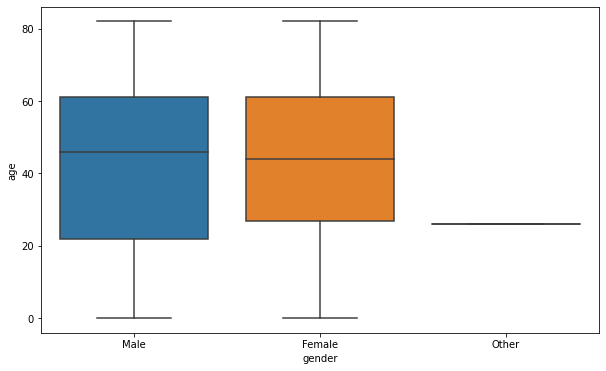

In [479]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['gender'],y = df['age'])
plt.show()

In [480]:
# From the above plot it can be inferred that male and female ages are more than 40
# we also have 'other' category in the gender column with age around 25.

# 10.Visualize the stroke sample based on :

#### a) BMI and Glucose Level & b) BMI and Age

In [481]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [482]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


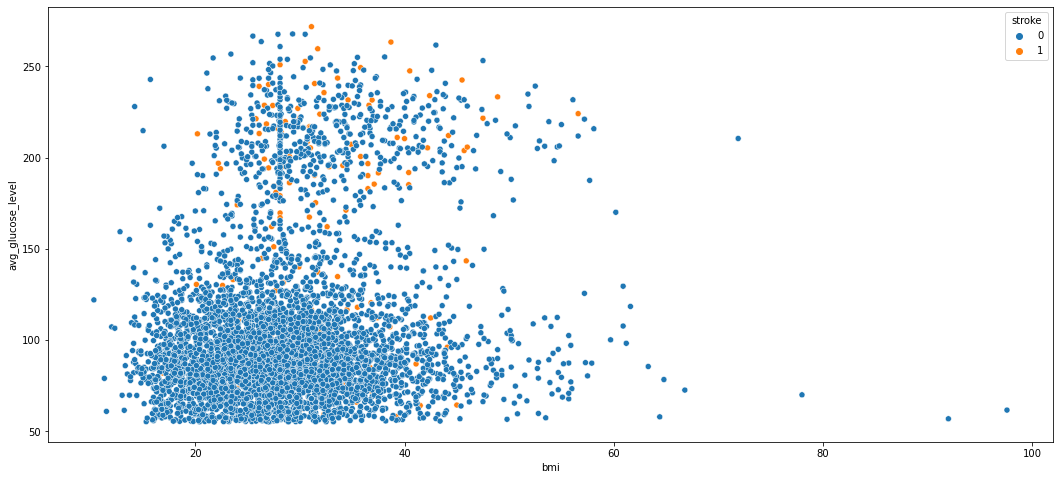

In [483]:
plt.figure(figsize =(18,8))
sns.scatterplot(x = df['bmi'],y = df['avg_glucose_level'],hue=df['stroke'])
plt.show()

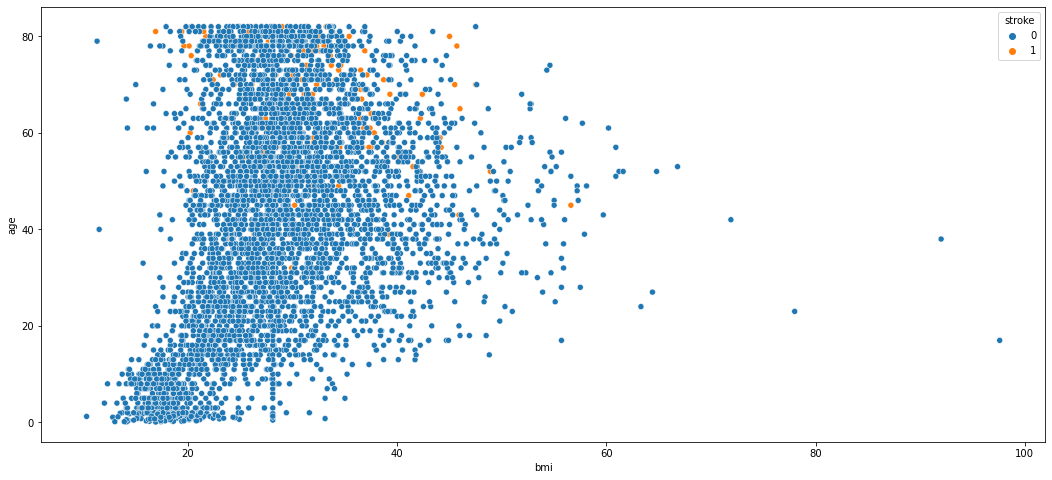

In [484]:
plt.figure(figsize =(18,8))
sns.scatterplot(x = df['bmi'],y = df['age'],hue=df['stroke'])
plt.show()

# 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

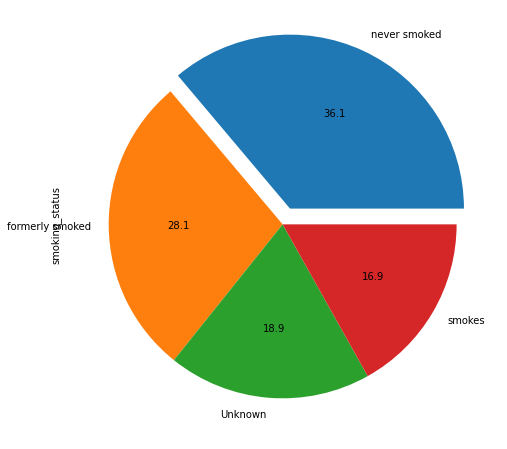

In [485]:
df[df['stroke']==1]['smoking_status'].value_counts().plot(kind = 'pie',autopct = '%1.1f',explode = [0.1,0.0,0.0,0.0])
plt.show()

In [486]:
# From the above pie plot it is clear that, 'never smoked' people are 36.1% from all the data.

# 12. Perform hypothesis testing to find the significant variables.
# 13. Drop the unnecessary columns.

In [487]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [488]:
X = pd.get_dummies(data = df, columns=['gender','hypertension','heart_disease','ever_married','work_type',
                                'Residence_type','smoking_status'],drop_first=True).drop('stroke',axis = 1)
y = df['stroke']
X = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=100)
model = sm.Logit(y_train,X_train).fit()
model.summary()

         Current function value: 0.158881
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           16
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.2034
Time:                        18:48:54   Log-Likelihood:                -568.32
converged:                      False   LL-Null:                       -713.47
Covariance Type:            nonrobust   LLR p-value:                 2.580e-52
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -8.1101      0.713    -11.381      0.000      -9.507      -6.713
age                                0.0774      0.007     11.341      0.000       0.064       0.091
avg_glucose_level                  0.0030      0.001      2.039      0.041       0.000       0.006
bmi                                0.0102      0.013      0.786      0.432      -0.015       0.036
gender_Male                        0.0420      0.167      0.252      0.801      -0.284       0.368
gender_Other                     -13.9140    1.4e+04     -0.001      0.999   -2.74e+04    2.73e+04
hypertension_1                     0.2688      0.201      1.340      0.180      -0.124       0.662
heart_disease_1                    0.0792      0.235      0.337      0.736      -0.381       0.539
ever_married_Yes                  -0.1400      0.268     -0.522      0.601      -0.665       0.385
work_type_Never_worked           -13.9924   6171.707     -0.002      0.998   -1.21e+04    1.21e+04
work_type_Private                  0.1482      0.246      0.602      0.547      -0.334       0.631
work_type_Self-employed           -0.3264      0.279     -1.168      0.243      -0.874       0.221
work_type_children                 0.7373      1.128      0.653      0.514      -1.474       2.949
Residence_type_Urban               0.1542      0.163      0.949      0.343      -0.164       0.473
smoking_status_formerly smoked     0.1256      0.244      0.515      0.607      -0.352       0.604
smoking_status_never smoked       -0.0724      0.234     -0.309      0.757      -0.531       0.387
smoking_status_smokes              0.2593      0.272      0.952      0.341      -0.274       0.793
==================================================================================================
"""

In [489]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [490]:
len(df)

5110

In [491]:
df = df[~(df['gender']=='Other')]

In [492]:
len(df)

5109

In [493]:
df['work_type'].value_counts(normalize=True)*100

Private          57.232335
Self-employed    16.030534
children         13.446858
Govt_job         12.859659
Never_worked      0.430613
Name: work_type, dtype: float64

In [494]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [495]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

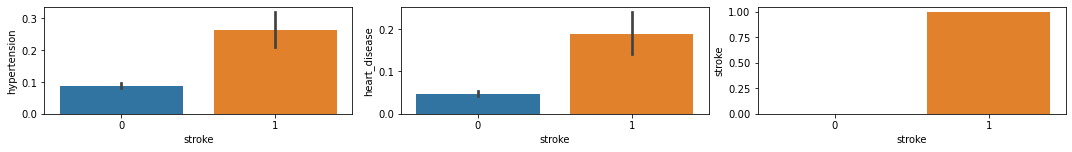

In [496]:
x = 1
for i in df.select_dtypes('int'):
    plt.subplot(4,3,x)
    sns.barplot(x = df['stroke'],y = df[i])
    x = x + 1
plt.tight_layout()
plt.show()

In [497]:
# VIF Value :-

In [498]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1


In [499]:
X = pd.get_dummies(data = df, columns=['gender','hypertension','heart_disease','ever_married','work_type',
                                'Residence_type','smoking_status'],drop_first=True).drop('stroke',axis = 1)
y = df['stroke']
X = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=1)
model = sm.Logit(y_train,X_train).fit()
model.summary()

         Current function value: 0.149599
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4087
Model:                          Logit   Df Residuals:                     4071
Method:                           MLE   Df Model:                           15
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.2013
Time:                        18:48:55   Log-Likelihood:                -611.41
converged:                      False   LL-Null:                       -765.51
Covariance Type:            nonrobust   LLR p-value:                 1.099e-56
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.7131      0.678    -11.372      0.000      -9.043      -6.384
age                                0.0748      0.007     11.491      0.000       0.062       0.088
avg_glucose_level                  0.0041      0.001      2.922      0.003       0.001       0.007
bmi                                0.0030      0.013      0.230      0.818      -0.022       0.028
gender_Male                       -0.1413      0.164     -0.862      0.389      -0.462       0.180
hypertension_1                     0.3969      0.190      2.089      0.037       0.024       0.769
heart_disease_1                    0.2987      0.220      1.357      0.175      -0.133       0.730
ever_married_Yes                  -0.4797      0.243     -1.973      0.048      -0.956      -0.003
work_type_Never_worked            -8.3355    304.732     -0.027      0.978    -605.598     588.927
work_type_Private                  0.2617      0.240      1.089      0.276      -0.209       0.733
work_type_Self-employed           -0.1386      0.272     -0.510      0.610      -0.671       0.394
work_type_children                 1.0527      0.861      1.222      0.222      -0.636       2.741
Residence_type_Urban               0.1483      0.159      0.936      0.350      -0.162       0.459
smoking_status_formerly smoked     0.0997      0.237      0.420      0.675      -0.366       0.565
smoking_status_never smoked       -0.1074      0.223     -0.483      0.629      -0.544       0.329
smoking_status_smokes              0.0512      0.270      0.189      0.850      -0.478       0.581
==================================================================================================
"""

In [500]:
a = [VIF(X.values,i) for i in range(X.shape[1])]
b = pd.DataFrame(a, columns=['vif'],index = X.columns)
b.sort_values('vif',ascending=False)

,vif
const,42.470413
work_type_children,3.237030
age,2.868813
work_type_Private,2.363699
ever_married_Yes,1.987594
work_type_Self-employed,1.937522
smoking_status_never smoked,1.797547
smoking_status_formerly smoked,1.600820
smoking_status_smokes,1.534412
bmi,1.298652


# 14. Write the code to replace following categories columns in integer format as follow 

#### a) Work_type ('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2) 
#### b) Ever_married ('Yes': 1, 'No': 0) c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [501]:
df['work_type'] = df['work_type'].map({'Private':0,'Govt_job':1,'Self-employed':2,'children':3,'Never_worked':4})
df['ever_married'] = df['ever_married'].map({'Yes':1,'No':0})
df['smoking_status'] = df['smoking_status'].map({'never smoked':0,'smokes':1,'formerly smoked':2,'Unknown':3})

In [502]:
df['Residence_type'] = df['Residence_type'].map({'Rural':0,'Urban':1})
df['gender'] = df['gender'].map({'Female':0,'Male':1})

In [503]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,0,49.0,0,0,1,0,1,171.23,34.4,1,1
4,0,79.0,1,0,1,2,0,174.12,24.0,0,1


In [504]:
# From the column 'work_type', 'ever_married', 'smoking_status', 'Residence_type' and 'gender' we have replace categories columns in integer format

# 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

In [505]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1


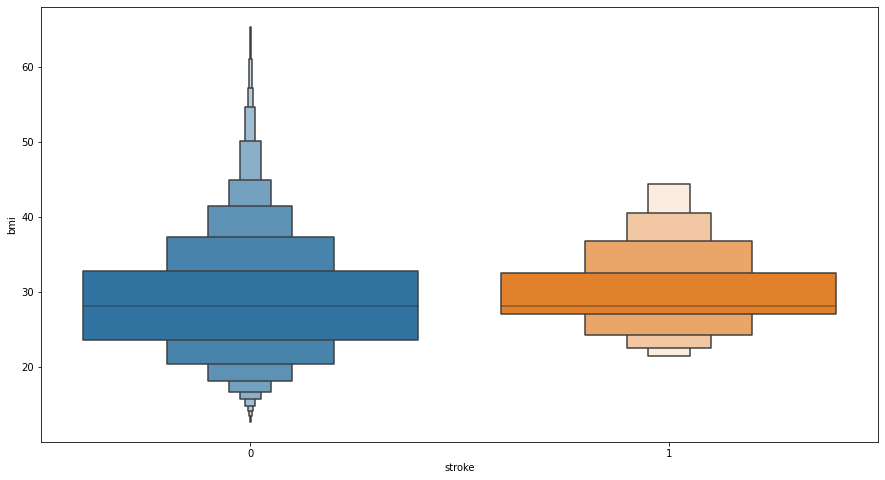

In [506]:
sns.boxenplot(x = df['stroke'],y = df['bmi'],showfliers=False)
plt.show()

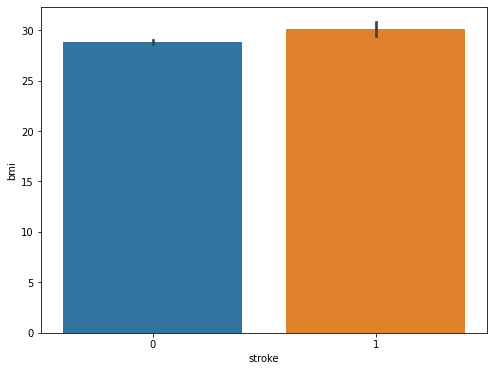

In [507]:
plt.figure(figsize =(8,6))
sns.barplot(x = df['stroke'],y = df['bmi'])
plt.show()

In [508]:
# From the above column we cam inferred that, Distribution of 'bmi' and 'stroke' columns in the dataset are equally distributed.

# 16. List down columns that are highly skewed.

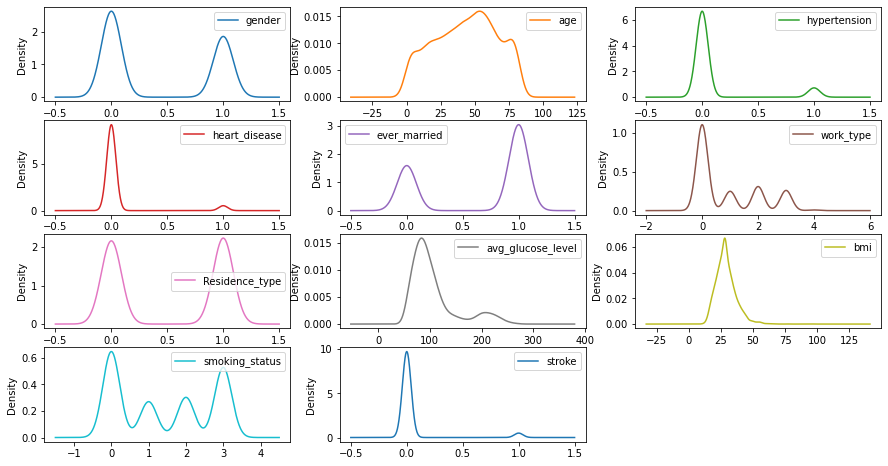

In [509]:
df.plot(kind = 'kde',subplots = True,sharex = False, sharey = False, layout = (4,3));

In [510]:
df.skew()

gender               0.349410
age                 -0.137430
hypertension         2.715026
heart_disease        3.946786
ever_married        -0.658345
work_type            0.876188
Residence_type      -0.032506
avg_glucose_level    1.572815
bmi                  1.087929
smoking_status       0.107760
stroke               4.192807
dtype: float64

In [511]:
df.skew()[df.skew() > 0.5]

hypertension         2.715026
heart_disease        3.946786
work_type            0.876188
avg_glucose_level    1.572815
bmi                  1.087929
stroke               4.192807
dtype: float64

In [512]:
# 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'stroke' column have high skweness.

# 17. List down the columns that are highly kurtosis

In [513]:
df.kurt()

gender               -1.878648
age                  -0.990931
hypertension          5.373470
heart_disease        13.582440
ever_married         -1.567196
work_type            -0.741422
Residence_type       -1.999726
avg_glucose_level     1.681721
bmi                   3.635026
smoking_status       -1.640393
stroke               15.585730
dtype: float64

In [514]:
# Reduce skewness

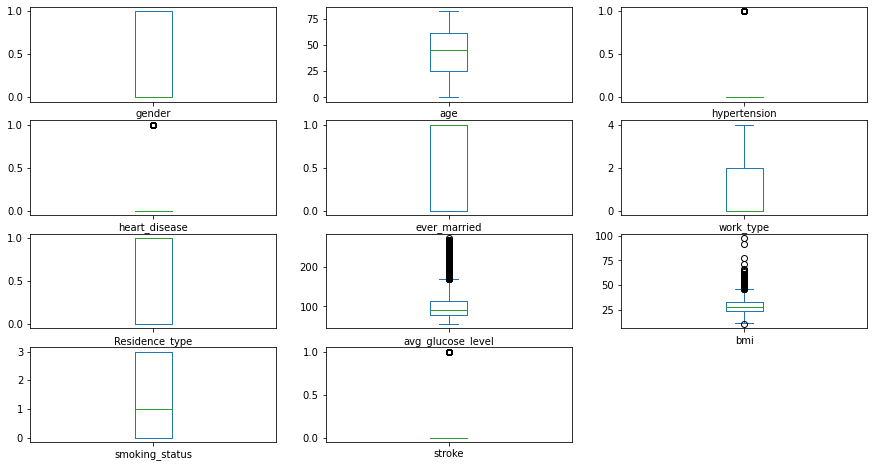

In [515]:
df.plot(kind = 'box',subplots = True,sharex = False, sharey = False, layout = (4,3))
plt.show()

In [516]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [517]:
df[df['avg_glucose_level']>180]['stroke'].value_counts()

0    504
1     79
Name: stroke, dtype: int64

In [518]:
# from above we can see there are some people whose avg_glucose_level was more that 180 and and from that 79 people had stroke
# so we will not remove outliers of glucose_level because it will help us to predict outcome..

In [519]:
df[df['bmi']>50]['stroke'].value_counts()

0    78
1     1
Name: stroke, dtype: int64

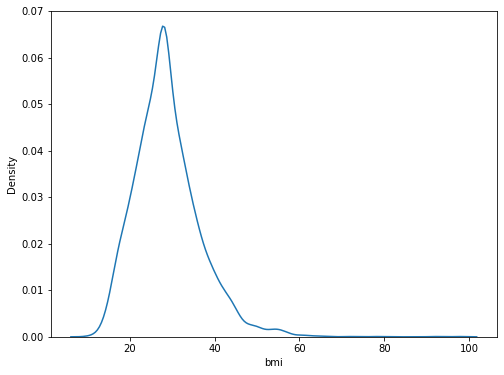

In [520]:
plt.figure(figsize =(8,6))
sns.kdeplot(df['bmi'])
plt.show()

In [521]:
# from above we can see peoples whose bmi is more than 50,from that only 1 person had stroke so we will remove outliers here

In [522]:
len(df)

5109

In [523]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
IQR = q3 - q1
a = q1 - (1.5*IQR)
b = q3 + (1.5*IQR)
df = df[df['bmi'].between(a,b)]

In [524]:
len(df)

4983

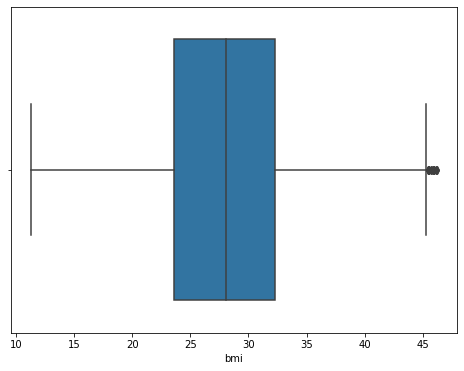

In [525]:
plt.figure(figsize =(8,6))
sns.boxplot(df['bmi'])
plt.show()

# 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.


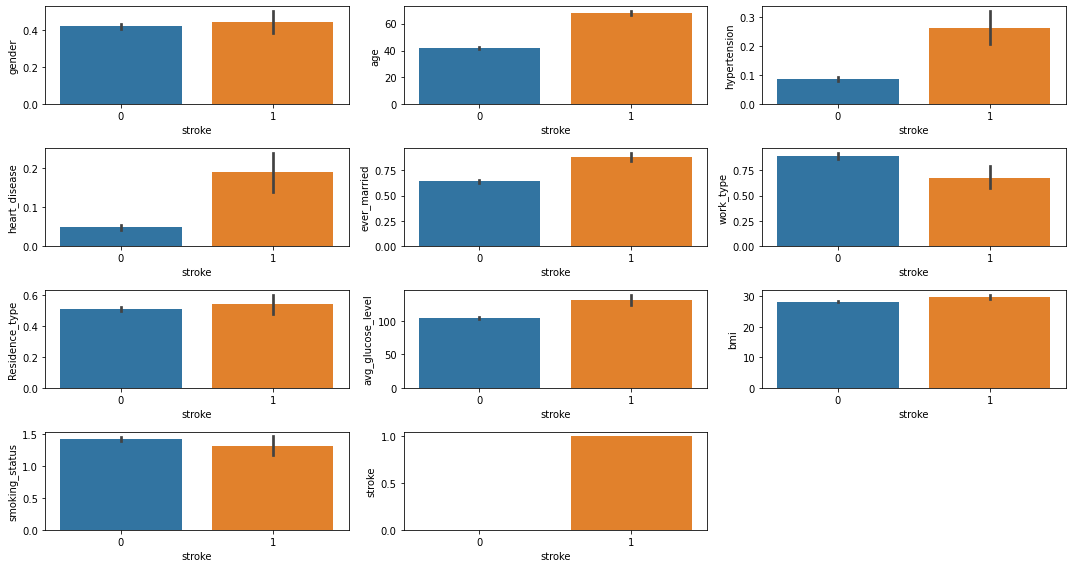

In [526]:
x = 1
for i in df.columns:
    plt.subplot(4,3,x)
    sns.barplot(x = df['stroke'],y = df[i])
    x = x + 1
plt.tight_layout()

# 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)


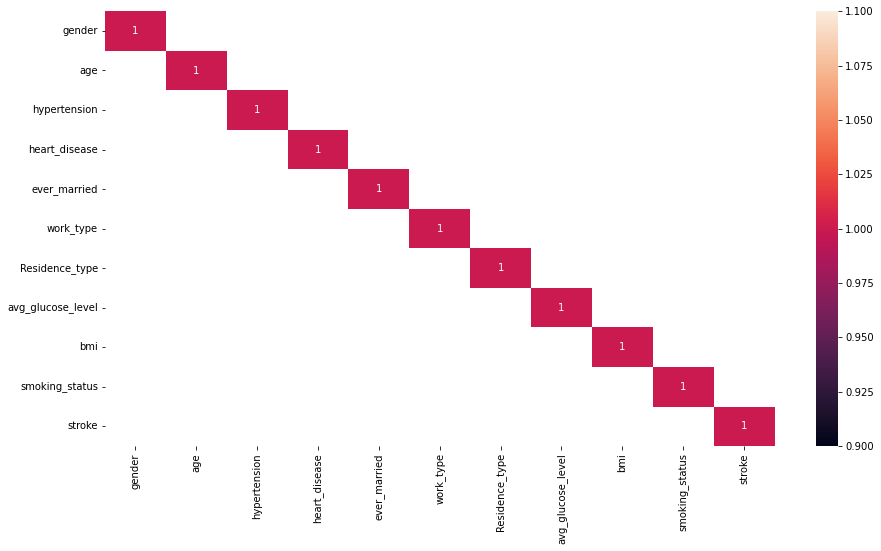

In [527]:
sns.heatmap(df.corr()[(df.corr()< -0.7) | (df.corr()>0.7)],annot = True)
plt.show()

In [528]:
# From the above plot it can be observed that, NO feature have strong positive or Negative correlation

# 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio

In [529]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1


In [530]:
X = pd.get_dummies(data = df, columns=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
                                       'smoking_status'],drop_first=True).drop('stroke',axis = 1)
y = df['stroke']
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

# 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.


In [531]:
df['stroke'].value_counts(normalize=True)*100

0    95.063215
1     4.936785
Name: stroke, dtype: float64

In [532]:
# data is imbalanced 

In [533]:
from imblearn.over_sampling import SMOTE

In [534]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1


In [535]:
x = df.drop('stroke',axis = 1)
y = df['stroke']

In [536]:
smote = SMOTE(random_state=1)
x_res, y_res = smote.fit_resample(x,y)

In [537]:
y_res.value_counts()

1    4737
0    4737
Name: stroke, dtype: int64

In [538]:
df_balanced = pd.concat([x_res,y_res],axis = 1)
df_balanced.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1


# 22. Model Selection/hyperparameter tuning - Try different models and fine tune their performance until you get the desired level of  performance on the given dataset. Model Evaluation  - Evaluate the models using appropriate evaluation metrics.

In [539]:
df_balanced.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1


In [540]:
df_balanced_old = df_balanced.copy()

In [541]:
sc = StandardScaler()

In [542]:
df_balanced[['age','avg_glucose_level','bmi']] = sc.fit_transform(df_balanced[['age','avg_glucose_level','bmi']])

In [543]:
df_balanced.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.533544,0,1,1,0,1,2.028689,1.344274,2,1
1,0,0.264116,0,0,1,2,0,1.543571,-0.130345,0,1
2,1,1.117306,0,1,1,0,0,-0.220477,0.632987,0,1


In [544]:
X = pd.get_dummies(data = df_balanced, columns=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
                                       'smoking_status'],drop_first=True).drop('stroke',axis = 1)
y = df_balanced['stroke']
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [545]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

         Current function value: 0.388266
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 6631
Model:                          Logit   Df Residuals:                     6615
Method:                           MLE   Df Model:                           15
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.4399
Time:                        18:48:59   Log-Likelihood:                -2574.6
converged:                      False   LL-Null:                       -4596.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3942      0.112     12.496      0.000       1.176       1.613
age                   2.2745      0.064     35.368      0.000       2.148       2.401
avg_glucose_level     0.3609      0.038      9.599      0.000       0.287       0.435
bmi                   0.0805      0.041      1.985      0.047       0.001       0.160
gender_1             -0.8140      0.076    -10.742      0.000      -0.963      -0.666
hypertension_1       -1.0038      0.117     -8.583      0.000      -1.233      -0.775
heart_disease_1      -1.0725      0.149     -7.208      0.000      -1.364      -0.781
ever_married_1       -1.0159      0.103     -9.904      0.000      -1.217      -0.815
work_type_1          -0.0234      0.093     -0.250      0.802      -0.207       0.160
work_type_2          -1.5938      0.106    -15.011      0.000      -1.802      -1.386
work_type_3           0.5404      0.484      1.116      0.264      -0.409       1.490
work_type_4         -16.7778   8723.722     -0.002      0.998   -1.71e+04    1.71e+04
Residence_type_1     -0.9349      0.072    -12.915      0.000      -1.077      -0.793
smoking_status_1      0.8848      0.091      9.690      0.000       0.706       1.064
smoking_status_2      0.2628      0.091      2.902      0.004       0.085       0.440
smoking_status_3     -1.0570      0.125     -8.438      0.000      -1.303      -0.811
=====================================================================================
"""

In [546]:
df_balanced[df_balanced['gender']==0]['stroke'].value_counts(normalize=True)*100

1    56.725789
0    43.274211
Name: stroke, dtype: float64

In [547]:
df_balanced[df_balanced['gender']==1]['stroke'].value_counts(normalize=True)*100

0    63.809217
1    36.190783
Name: stroke, dtype: float64

In [548]:
# Creating the user defined function for Classfication report/Confusion Matrix/ROC-AUC Curve

In [549]:
def conf_accu(y_train,y_test,y_pred_train,y_pred_test):
    print('classification report for training \n')
    print(classification_report(y_train,y_pred_train))
    print('classification report for testing \n')
    print(classification_report(y_test,y_pred_test))
    
    a = confusion_matrix(y_test,y_pred_test)
    sns.heatmap(a,annot = True,fmt='0.2f')
    
    TN = a[0,0]
    TP = a[1,1]
    FN = a[1,0]
    FP = a[0,1]

    accuracy = (TN + TP) / (TN + TP + FP + FN)
    print('Accuracy of model is :',accuracy*100)
    
    precision = TP / (TP + FP)
    print('Precision of model is :',precision*100)
    
    recall = TP / (TP + FN)
    print('recall of model is :',recall*100)
    
    specificity = TN / (TN + FN)
    print('Specificity of model is :',specificity*100)
    
    F1_score = (2*precision*recall) / (precision + recall)
    print('F1_score of model is :',F1_score*100)

In [550]:
def roc_train(y_train,y_pred_prob_train):
    fpr, tpr, threshold = roc_curve(y_train,y_pred_prob_train)
    plt.plot(fpr, tpr, marker = '*',color = 'b')
    plt.plot([0,1],[0,1],'r--')
    auc_score = round(metrics.roc_auc_score(y_train,y_pred_prob_train),2)
    plt.text(x = 0.8,y = 0.4, s = ('auc_score :',auc_score))
    plt.grid(True)
    plt.show()

In [551]:
def roc_test(y_test,y_pred_prob_test):
    fpr, tpr, threshold = roc_curve(y_test,y_pred_prob_test)
    plt.plot(fpr, tpr, marker = '*',color = 'g')
    plt.plot([0,1],[0,1],'r--')
    auc_score = round(metrics.roc_auc_score(y_test,y_pred_prob_test),2)
    plt.text(x = 0.8,y = 0.4, s = ('auc_score :',auc_score))
    plt.grid(True)
    plt.show()

In [552]:
df_balanced.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.533544,0,1,1,0,1,2.028689,1.344274,2,1
1,0,0.264116,0,0,1,2,0,1.543571,-0.130345,0,1


In [553]:
X = pd.get_dummies(data = df_balanced, columns=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
                                       'smoking_status'],drop_first=True).drop('stroke',axis = 1)
y = df_balanced['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [554]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6631, 15)
(2843, 15)
(6631,)
(2843,)


# 1. Logistic Classification :-

In [555]:
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)

In [556]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)
y_pred_prob_train = model_lr.predict_proba(X_train)
y_pred_prob_test = model_lr.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      3316
           1       0.81      0.84      0.82      3315

    accuracy                           0.82      6631
   macro avg       0.82      0.82      0.82      6631
weighted avg       0.82      0.82      0.82      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1421
           1       0.82      0.85      0.83      1422

    accuracy                           0.83      2843
   macro avg       0.83      0.83      0.83      2843
weighted avg       0.83      0.83      0.83      2843

Accuracy of model is : 82.79985930355258
Precision of model is : 81.58429248476642
recall of model is : 84.73980309423348
Specificity of model is : 84.11420204978039
F1_score of model is : 83.13211452224904


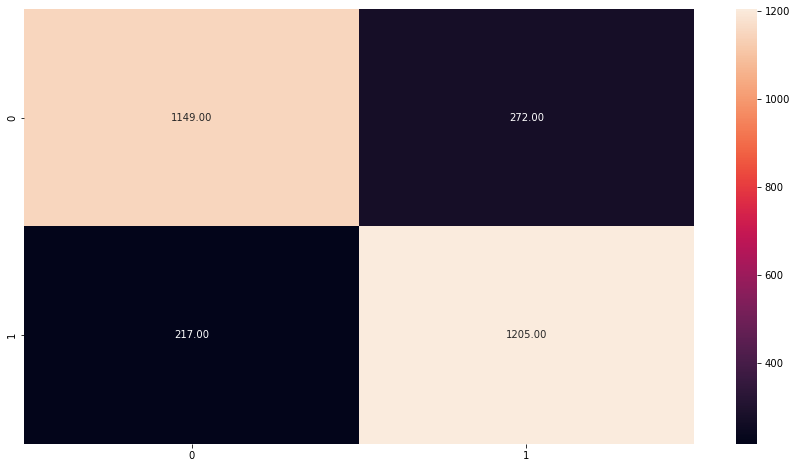

In [557]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

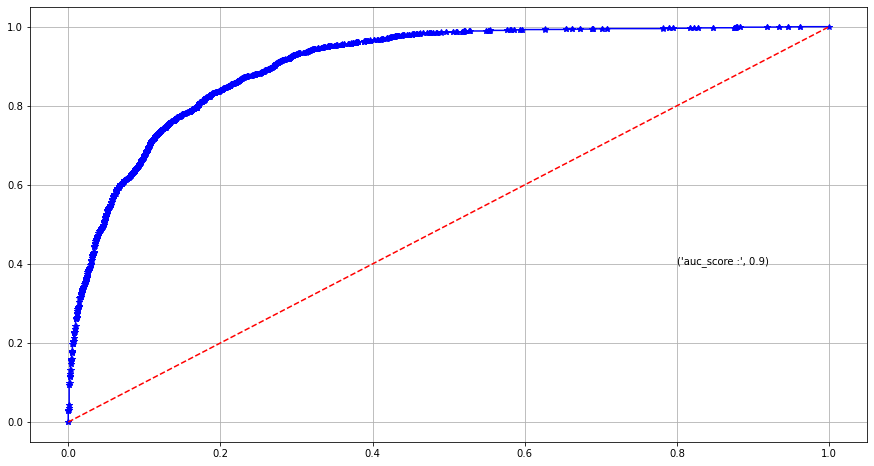

In [558]:
roc_train(y_train,y_pred_prob_train[:,1])

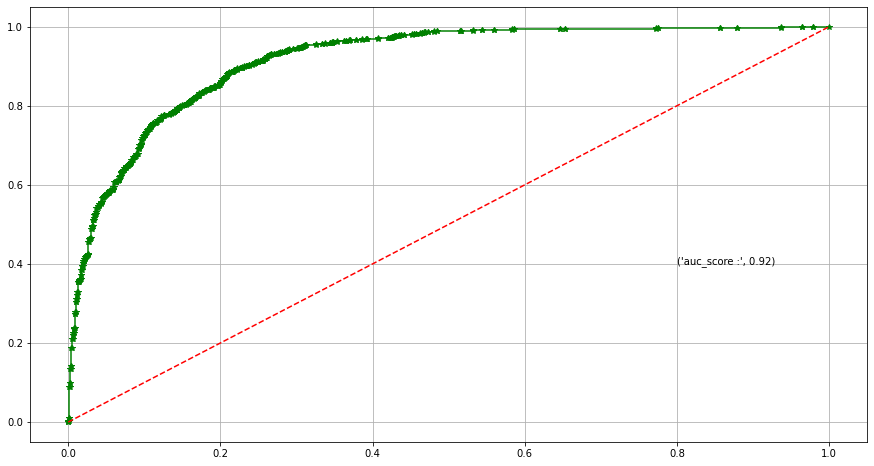

In [559]:
roc_test(y_test,y_pred_prob_test[:,1])

# 2. Decision Tree :- 

In [560]:
df_balanced_old.head(2) # unscaled data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1


In [561]:
X = df_balanced_old.drop('stroke',axis = 1)
y = df_balanced_old['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [562]:
a = DecisionTreeClassifier(random_state=1)
model_dt = a.fit(X_train,y_train)

In [563]:
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
y_pred_prob_train = model_dt.predict_proba(X_train)
y_pred_prob_test = model_dt.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3316
           1       1.00      1.00      1.00      3315

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1421
           1       0.91      0.93      0.92      1422

    accuracy                           0.92      2843
   macro avg       0.92      0.92      0.92      2843
weighted avg       0.92      0.92      0.92      2843

Accuracy of model is : 92.29686950404502
Precision of model is : 91.34020618556701
recall of model is : 93.45991561181435
Specificity of model is : 93.29971181556196
F1_score of model is : 92.38790406673617


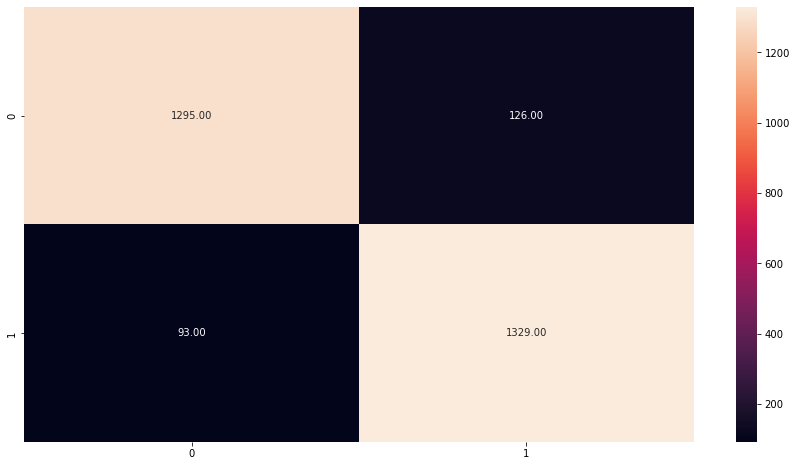

In [564]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

In [565]:
## overfitting model above so we will do tree prunning.

In [566]:
a = [{'criterion':['gini','entropy'],
      'max_depth': range(3,10),
      'max_leaf_nodes': range(3,10),
      'min_samples_split':range(3,10)}]
b = DecisionTreeClassifier(random_state=1)
c = GridSearchCV(estimator=b, param_grid=a, cv = 5, scoring='roc_auc')
d = c.fit(X_train,y_train)
d.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_split': 3}

In [567]:
a = DecisionTreeClassifier(random_state=1,criterion='gini',max_depth=5, max_leaf_nodes=9, min_samples_split=3)
model_dt = a.fit(X_train,y_train)

In [568]:
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
y_pred_prob_train = model_dt.predict_proba(X_train)
y_pred_prob_test = model_dt.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      3316
           1       0.76      0.91      0.83      3315

    accuracy                           0.81      6631
   macro avg       0.82      0.81      0.81      6631
weighted avg       0.82      0.81      0.81      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1421
           1       0.76      0.91      0.83      1422

    accuracy                           0.82      2843
   macro avg       0.83      0.82      0.81      2843
weighted avg       0.83      0.82      0.81      2843

Accuracy of model is : 81.67428772423496
Precision of model is : 76.48442092886538
recall of model is : 91.49085794655414
Specificity of model is : 89.4045534150613
F1_score of model is : 83.31732308677554


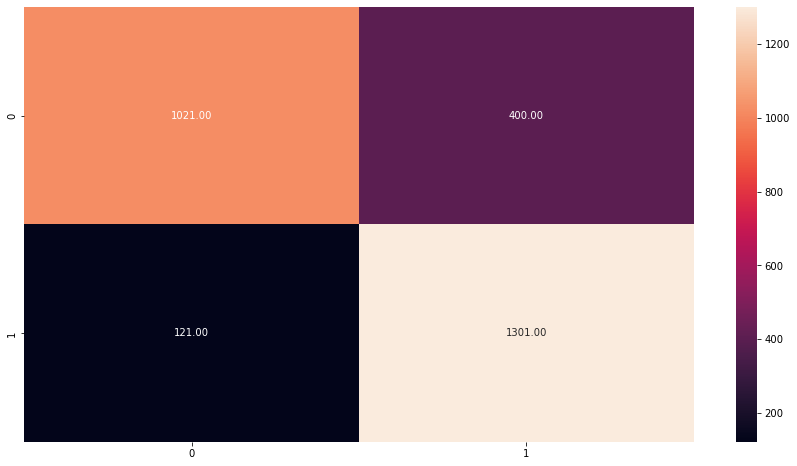

In [569]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

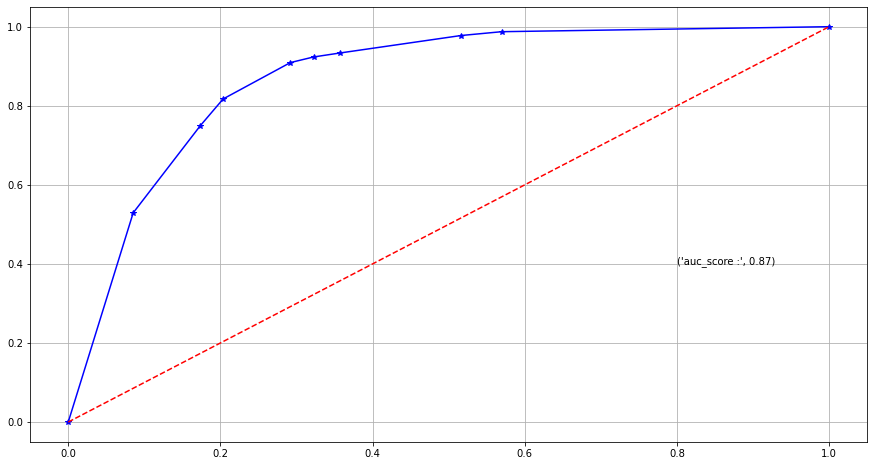

In [570]:
roc_train(y_train,y_pred_prob_train[:,1])

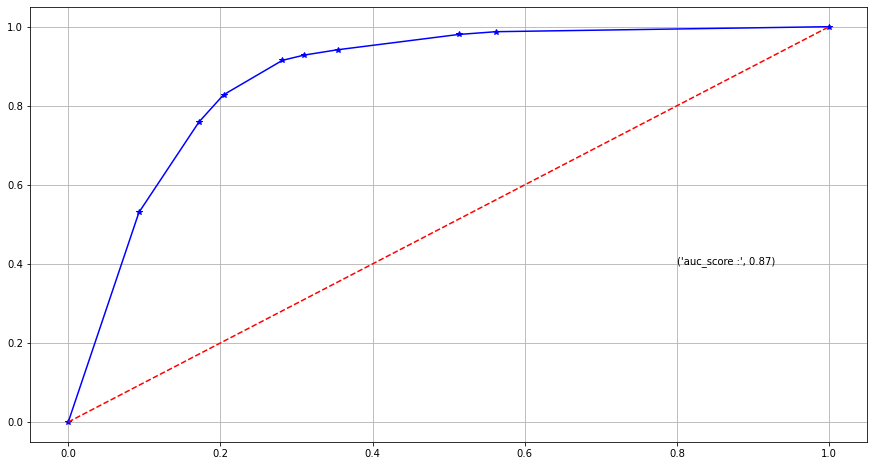

In [571]:
roc_train(y_test,y_pred_prob_test[:,1])

# 3. Random Forest :- 

In [572]:
a = RandomForestClassifier(random_state=1)
model_rm = a.fit(X_train,y_train)

In [573]:
y_pred_train = model_rm.predict(X_train)
y_pred_test = model_rm.predict(X_test)
y_pred_prob_train = model_rm.predict_proba(X_train)
y_pred_prob_test = model_rm.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3316
           1       1.00      1.00      1.00      3315

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1421
           1       0.93      0.96      0.95      1422

    accuracy                           0.95      2843
   macro avg       0.95      0.95      0.95      2843
weighted avg       0.95      0.95      0.95      2843

Accuracy of model is : 94.5128385508266
Precision of model is : 93.00271739130434
recall of model is : 96.27285513361463
Specificity of model is : 96.1342086068563
F1_score of model is : 94.60953697304768


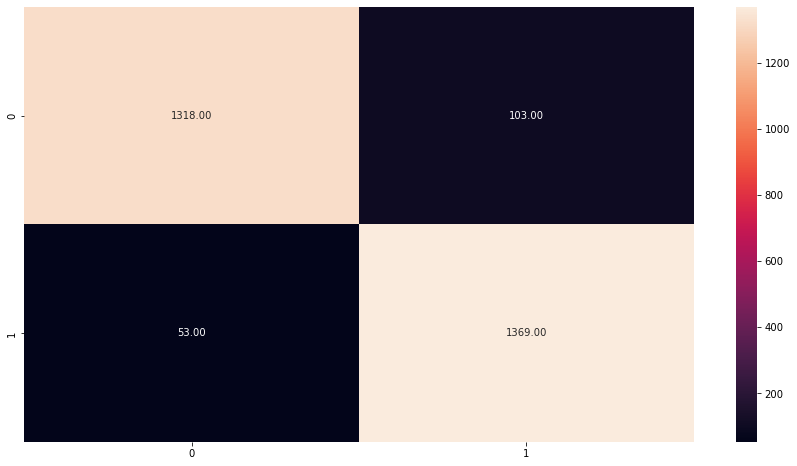

In [574]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

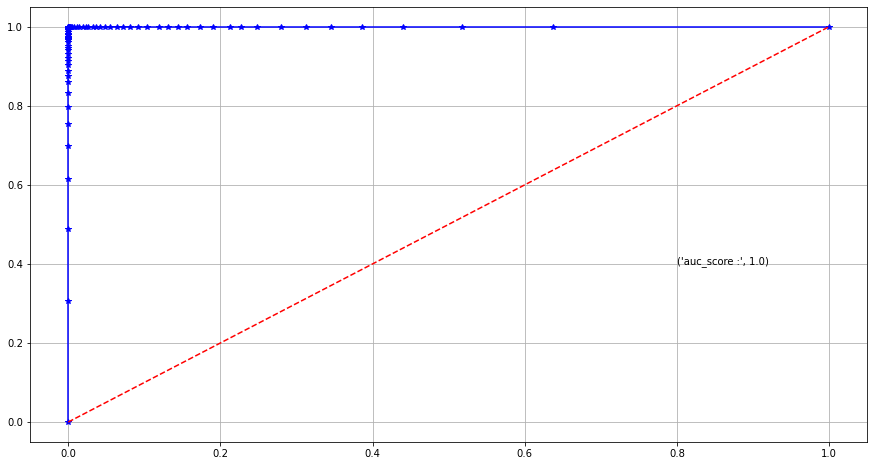

In [575]:
roc_train(y_train,y_pred_prob_train[:,1])

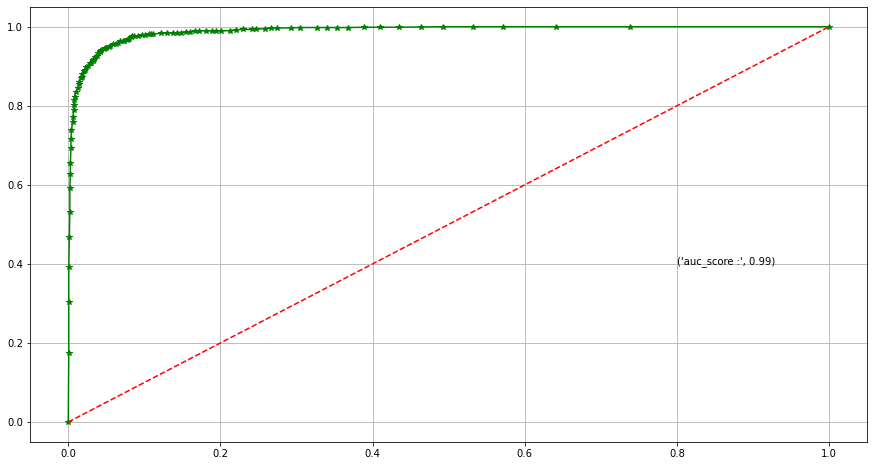

In [576]:
roc_test(y_test,y_pred_prob_test[:,1])

In [577]:
# tuning of Hyper-paramters :- 

In [578]:
a = [{'criterion':['gini','entropy'],
      'max_depth': [4,5,6],
      'n_estimators': [90,110],
      'max_leaf_nodes': [3,4]}]
b = RandomForestClassifier(random_state=1)
c = GridSearchCV(estimator=b, param_grid=a, cv = 5, scoring='roc_auc')
d = c.fit(X_train,y_train)
d.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 4,
 'n_estimators': 90}

In [579]:
a = RandomForestClassifier(n_estimators = 90,random_state=1,criterion='entropy',max_depth=4, max_leaf_nodes=4)
model_rm = a.fit(X_train,y_train)

In [580]:
y_pred_train = model_rm.predict(X_train)
y_pred_test = model_rm.predict(X_test)
y_pred_prob_train = model_rm.predict_proba(X_train)
y_pred_prob_test = model_rm.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      3316
           1       0.72      0.92      0.81      3315

    accuracy                           0.78      6631
   macro avg       0.81      0.78      0.78      6631
weighted avg       0.81      0.78      0.78      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1421
           1       0.73      0.92      0.82      1422

    accuracy                           0.79      2843
   macro avg       0.81      0.79      0.79      2843
weighted avg       0.81      0.79      0.79      2843

Accuracy of model is : 79.3176222300387
Precision of model is : 73.3221476510067
recall of model is : 92.19409282700421
Specificity of model is : 89.478672985782
F1_score of model is : 81.6822429906542


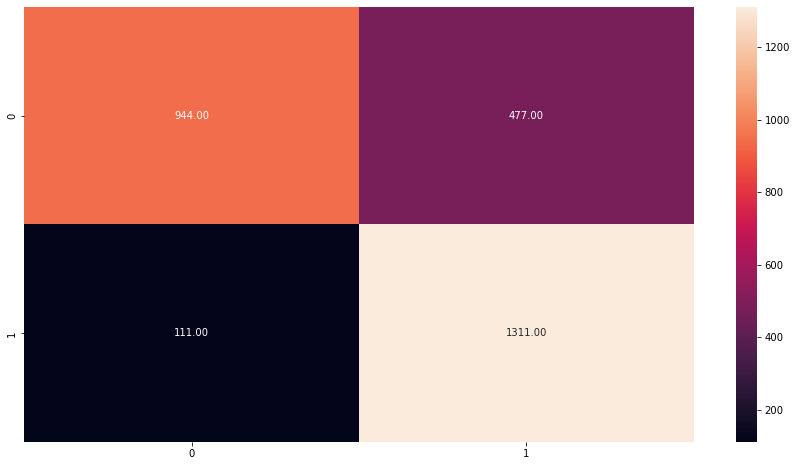

In [581]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

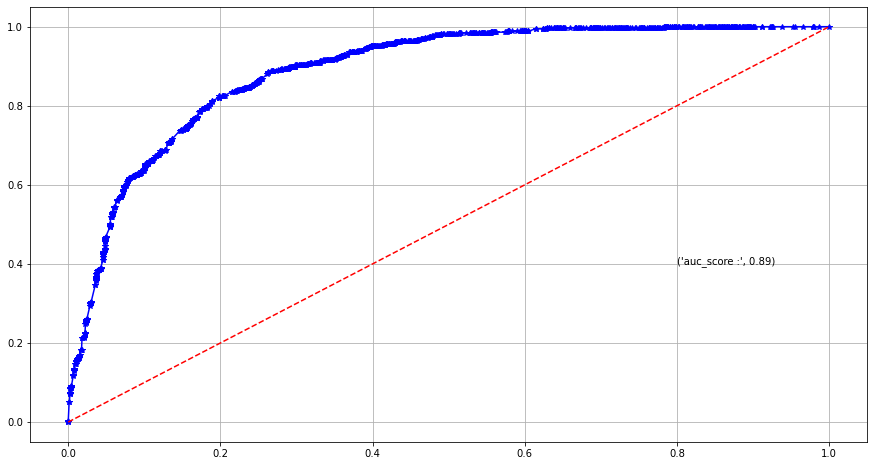

In [582]:
roc_train(y_train,y_pred_prob_train[:,1])

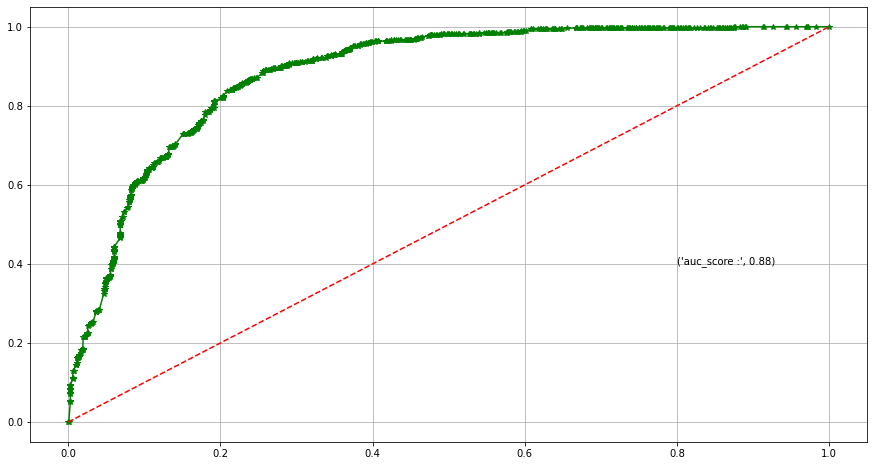

In [583]:
roc_test(y_test,y_pred_prob_test[:,1])

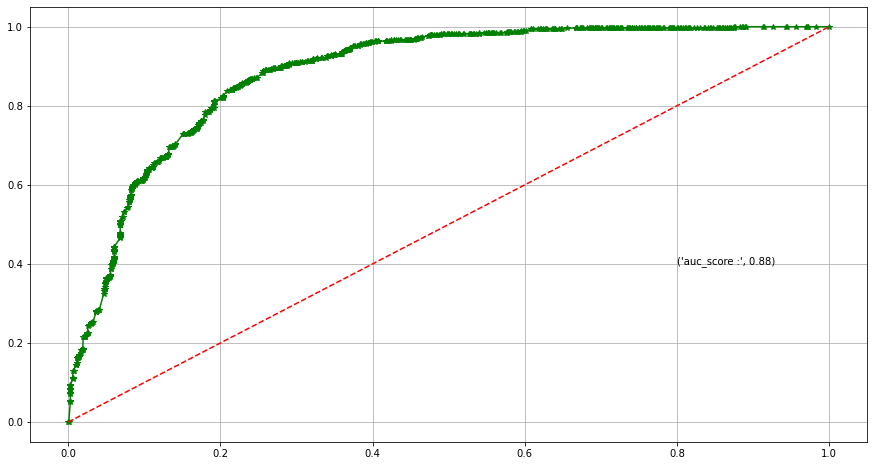

In [584]:
roc_test(y_test,y_pred_prob_test[:,1])

# 4.ADABoost Classifier :- 

In [585]:
a = AdaBoostClassifier(n_estimators=40,learning_rate=0.2,random_state=1)
model_ad = a.fit(X_train,y_train)

In [586]:
y_pred_train = model_ad.predict(X_train)
y_pred_test = model_ad.predict(X_test)
y_pred_prob_train = model_ad.predict_proba(X_train)
y_pred_prob_test = model_ad.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      3316
           1       0.78      0.89      0.83      3315

    accuracy                           0.82      6631
   macro avg       0.83      0.82      0.82      6631
weighted avg       0.83      0.82      0.82      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1421
           1       0.79      0.90      0.84      1422

    accuracy                           0.83      2843
   macro avg       0.84      0.83      0.83      2843
weighted avg       0.84      0.83      0.83      2843

Accuracy of model is : 83.01090397467465
Precision of model is : 78.99938233477455
recall of model is : 89.943741209564
Specificity of model is : 88.31699346405229
F1_score of model is : 84.11706675435711


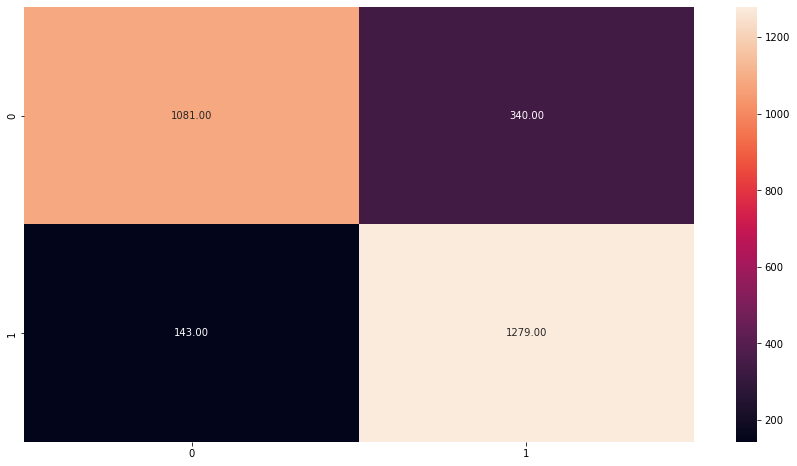

In [587]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

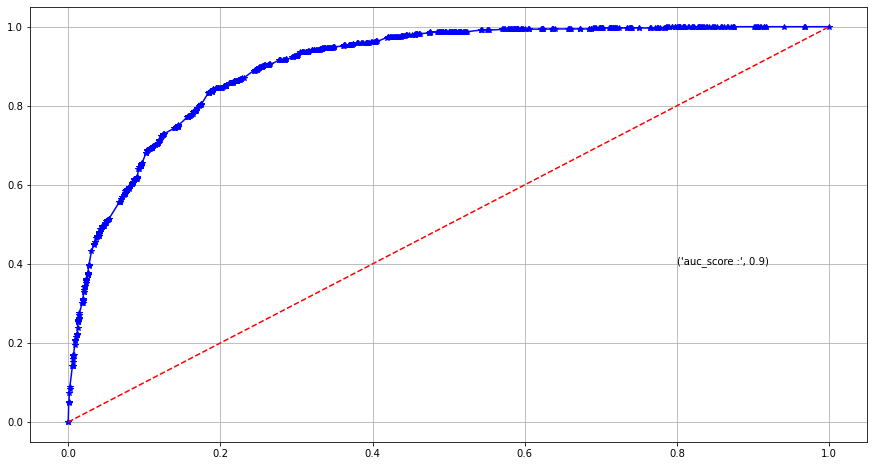

In [588]:
roc_train(y_train,y_pred_prob_train[:,1])

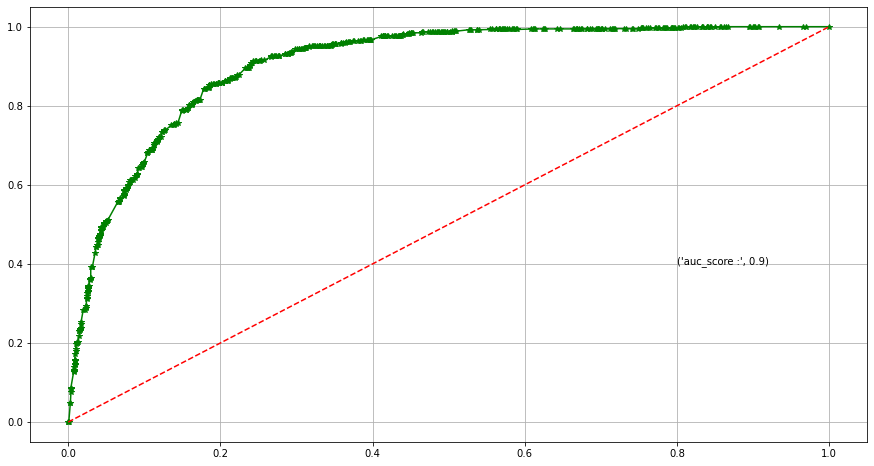

In [589]:
roc_test(y_test,y_pred_prob_test[:,1])

# 5. Gradient-Boost Algorithm :-

In [590]:
a = [{'max_depth': [4,5,6],
      'n_estimators': [40,50,60],
      'max_leaf_nodes': [5,6,7]}]
b = GradientBoostingClassifier(random_state=1)
c = GridSearchCV(estimator=b, param_grid=a, cv = 5, scoring='roc_auc')
d = c.fit(X_train,y_train)
d.best_params_

{'max_depth': 6, 'max_leaf_nodes': 7, 'n_estimators': 60}

In [591]:
a = GradientBoostingClassifier(n_estimators = 60,max_depth = 6, max_leaf_nodes = 7)
model_gb = a.fit(X_train,y_train)

In [592]:
y_pred_train = model_gb.predict(X_train)
y_pred_test = model_gb.predict(X_test)
y_pred_prob_train = model_gb.predict_proba(X_train)
y_pred_prob_test = model_gb.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      3316
           1       0.85      0.92      0.88      3315

    accuracy                           0.88      6631
   macro avg       0.88      0.88      0.88      6631
weighted avg       0.88      0.88      0.88      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1421
           1       0.85      0.91      0.88      1422

    accuracy                           0.88      2843
   macro avg       0.88      0.88      0.88      2843
weighted avg       0.88      0.88      0.88      2843

Accuracy of model is : 87.61871262750616
Precision of model is : 85.24374176548089
recall of model is : 90.9985935302391
Specificity of model is : 90.33962264150944
F1_score of model is : 88.02721088435375


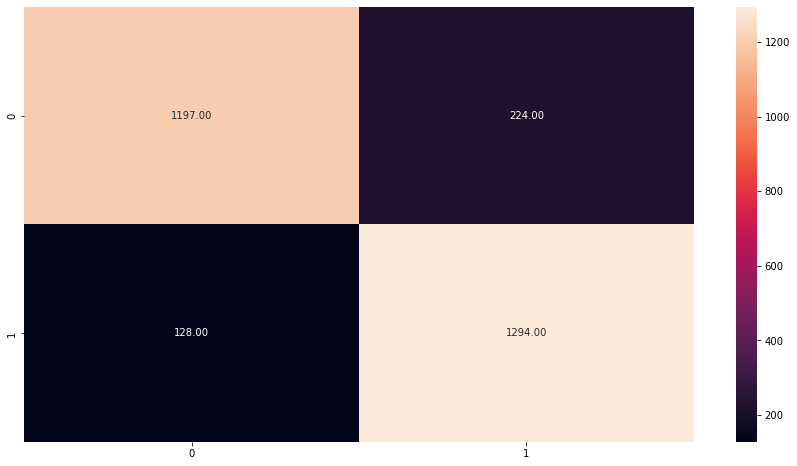

In [593]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

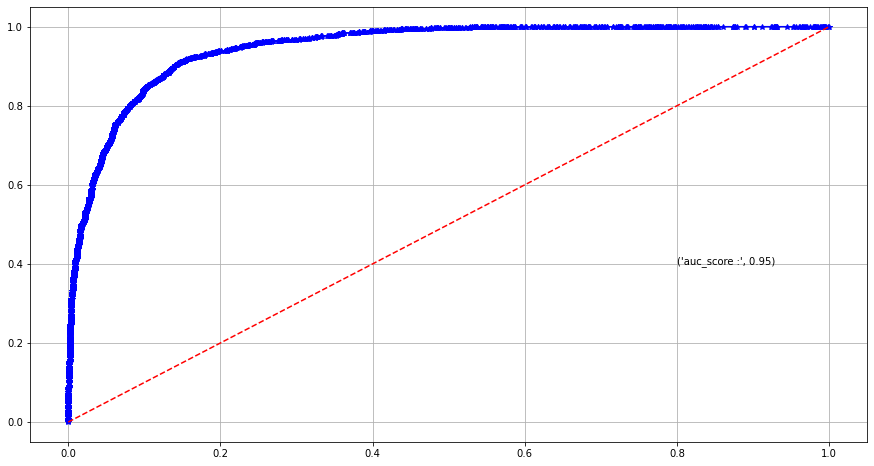

In [594]:
roc_train(y_train,y_pred_prob_train[:,1])

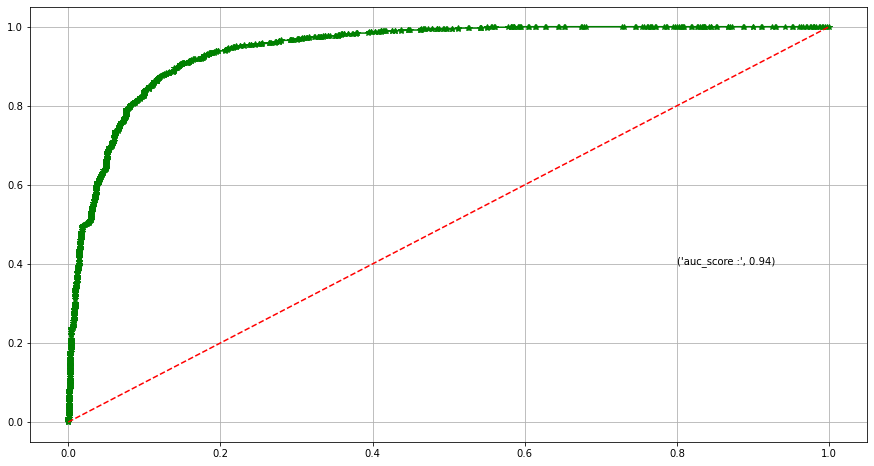

In [595]:
roc_test(y_test,y_pred_prob_test[:,1])

# 6. XGBoost Classifier :- 

In [596]:
a = XGBClassifier()

In [597]:
a = [{'max_depth': [4,5,6],
      'n_estimators': [40,50,60],
      'gamma': [2,4,6]}]
b = XGBClassifier(random_state=1)
c = GridSearchCV(estimator=b, param_grid=a, cv = 5, scoring='roc_auc')
d = c.fit(X_train,y_train)
d.best_params_

{'gamma': 2, 'max_depth': 6, 'n_estimators': 60}

In [598]:
a = XGBClassifier(n_estimators = 60,max_depth = 6, gamma = 2)
model_xg = a.fit(X_train,y_train)

In [599]:
y_pred_train = model_gb.predict(X_train)
y_pred_test = model_gb.predict(X_test)
y_pred_prob_train = model_gb.predict_proba(X_train)
y_pred_prob_test = model_gb.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      3316
           1       0.85      0.92      0.88      3315

    accuracy                           0.88      6631
   macro avg       0.88      0.88      0.88      6631
weighted avg       0.88      0.88      0.88      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1421
           1       0.85      0.91      0.88      1422

    accuracy                           0.88      2843
   macro avg       0.88      0.88      0.88      2843
weighted avg       0.88      0.88      0.88      2843

Accuracy of model is : 87.61871262750616
Precision of model is : 85.24374176548089
recall of model is : 90.9985935302391
Specificity of model is : 90.33962264150944
F1_score of model is : 88.02721088435375


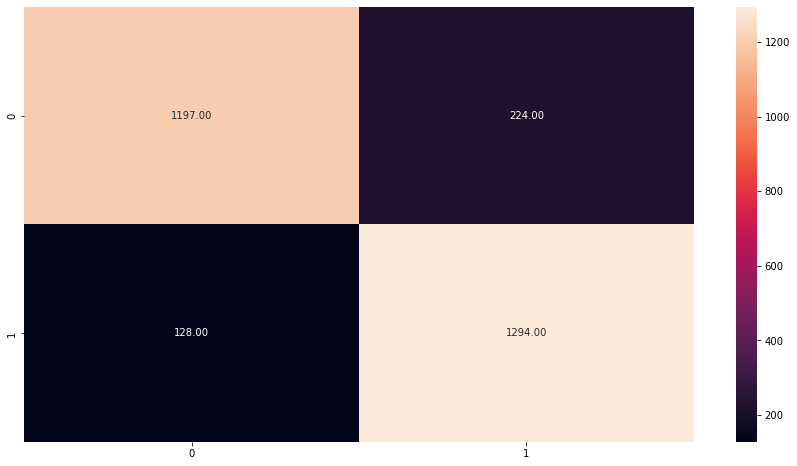

In [600]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

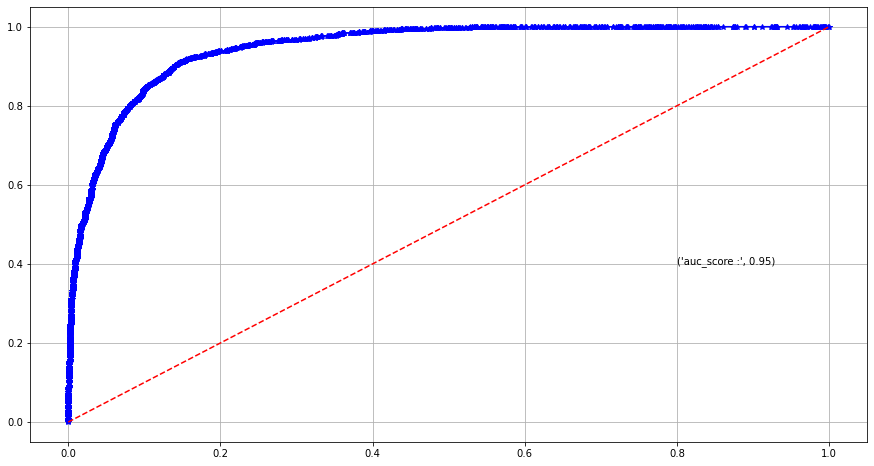

In [601]:
roc_train(y_train,y_pred_prob_train[:,1])

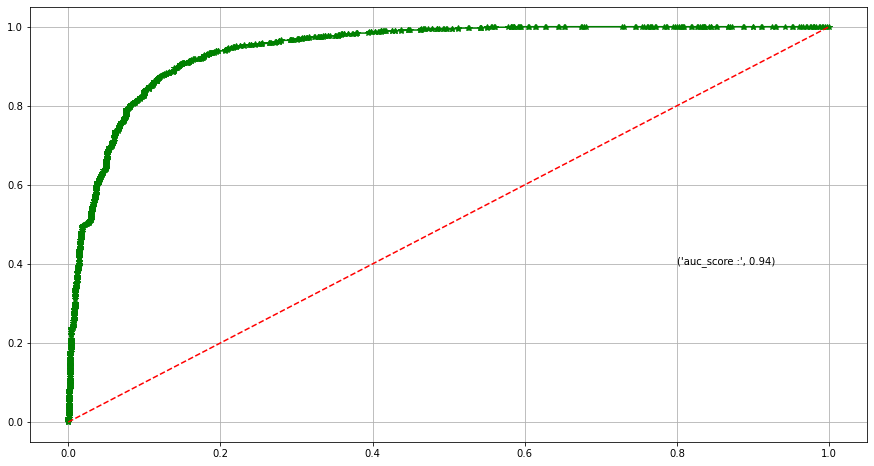

In [602]:
roc_test(y_test,y_pred_prob_test[:,1])

# 7. KNN Classifier :-

In [603]:
df_balanced.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.533544,0,1,1,0,1,2.028689,1.344274,2,1
1,0,0.264116,0,0,1,2,0,1.543571,-0.130345,0,1


In [604]:
X = df_balanced.drop('stroke',1)
y = df_balanced['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [605]:
a = [{'n_neighbors':[4,5,6], 'p':[2,3,4]}]
b = KNeighborsClassifier()
c = GridSearchCV(estimator=b, param_grid=a, cv = 5, scoring='roc_auc')
d = c.fit(X_train,y_train)
d.best_params_

{'n_neighbors': 6, 'p': 2}

In [606]:
a = KNeighborsClassifier(n_neighbors = 6,p = 2)
model_kn = a.fit(X_train,y_train)

In [607]:
y_pred_train = model_kn.predict(X_train)
y_pred_test = model_kn.predict(X_test)
y_pred_prob_train = model_kn.predict_proba(X_train)
y_pred_prob_test = model_kn.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3316
           1       0.88      0.96      0.92      3315

    accuracy                           0.91      6631
   macro avg       0.92      0.91      0.91      6631
weighted avg       0.92      0.91      0.91      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1421
           1       0.84      0.95      0.89      1422

    accuracy                           0.89      2843
   macro avg       0.89      0.89      0.89      2843
weighted avg       0.89      0.89      0.89      2843

Accuracy of model is : 88.81463243053112
Precision of model is : 84.5
recall of model is : 95.0773558368495
Specificity of model is : 94.36846339501207
F1_score of model is : 89.47716743878227


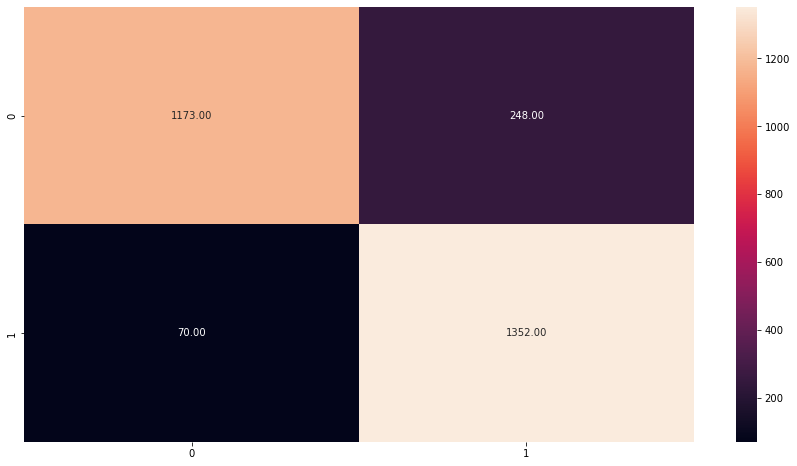

In [608]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

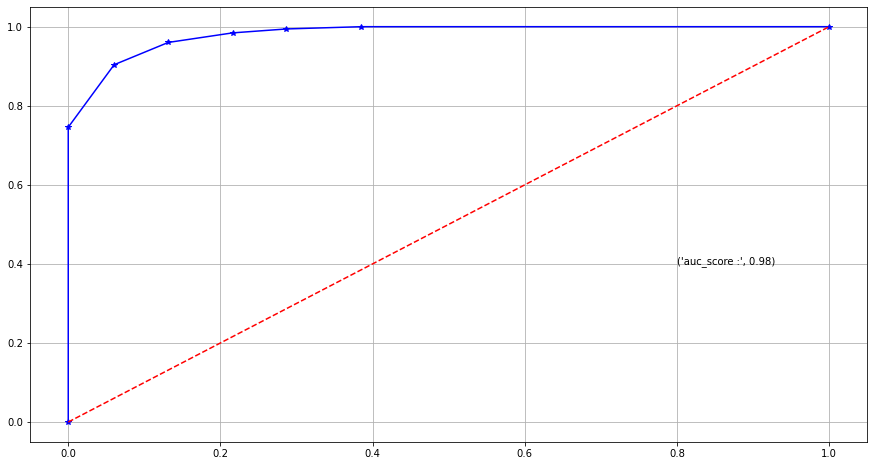

In [609]:
roc_train(y_train,y_pred_prob_train[:,1])

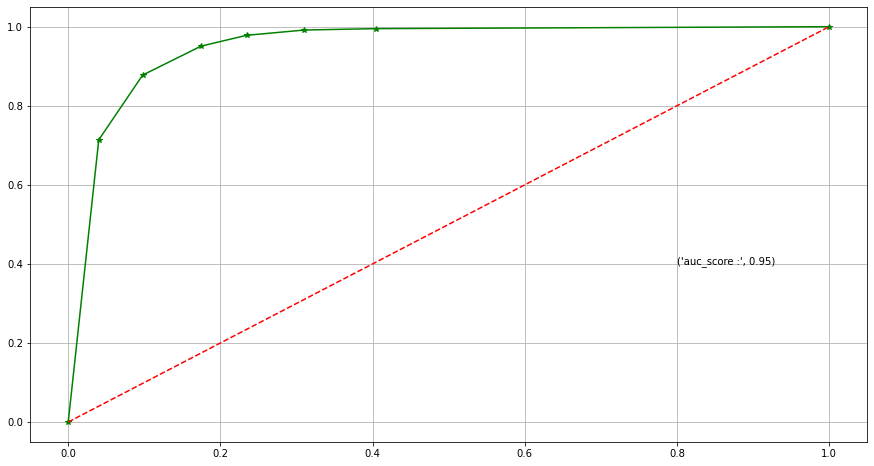

In [610]:
roc_test(y_test,y_pred_prob_test[:,1])

# 8. Naive Bayes :- 

In [611]:
a = GaussianNB()
model_nb = a.fit(X_train,y_train)

In [612]:
y_pred_train = model_nb.predict(X_train)
y_pred_test = model_nb.predict(X_test)
y_pred_prob_train = model_nb.predict_proba(X_train)
y_pred_prob_test = model_nb.predict_proba(X_test)

classification report for training 

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3316
           1       0.75      0.87      0.81      3315

    accuracy                           0.79      6631
   macro avg       0.80      0.79      0.79      6631
weighted avg       0.80      0.79      0.79      6631

classification report for testing 

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1421
           1       0.76      0.88      0.81      1422

    accuracy                           0.80      2843
   macro avg       0.81      0.80      0.80      2843
weighted avg       0.81      0.80      0.80      2843

Accuracy of model is : 79.8804080196975
Precision of model is : 75.82017010935601
recall of model is : 87.76371308016878
Specificity of model is : 85.46365914786968
F1_score of model is : 81.35593220338984


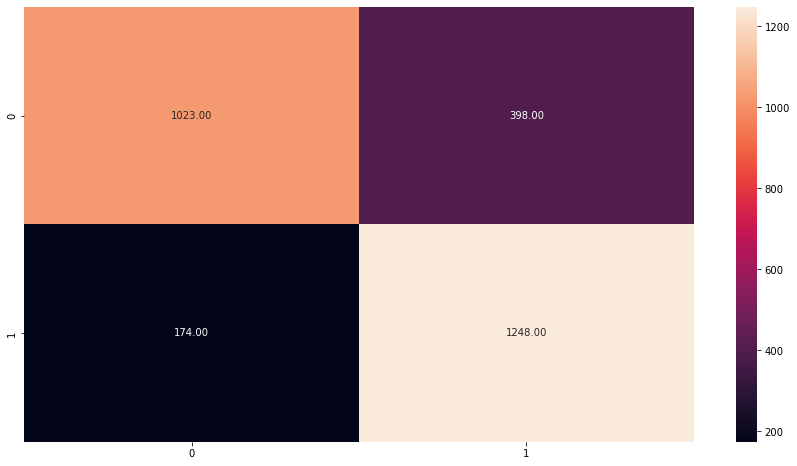

In [613]:
conf_accu(y_train,y_test,y_pred_train,y_pred_test)

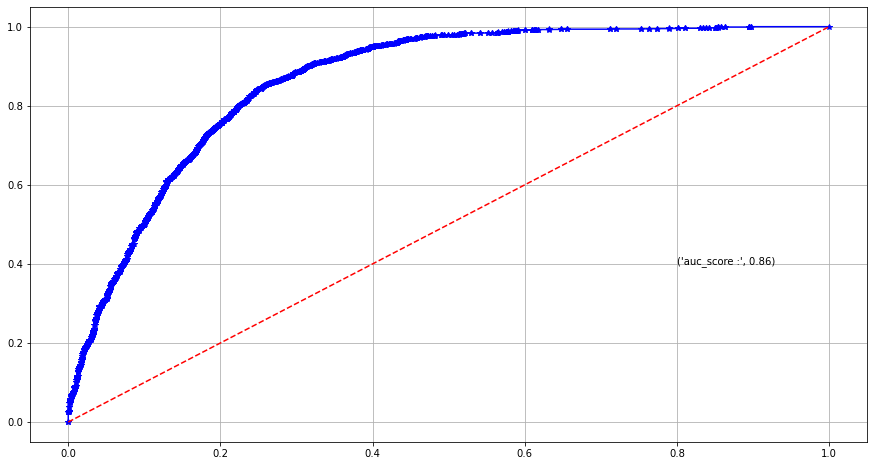

In [614]:
roc_train(y_train,y_pred_prob_train[:,1])

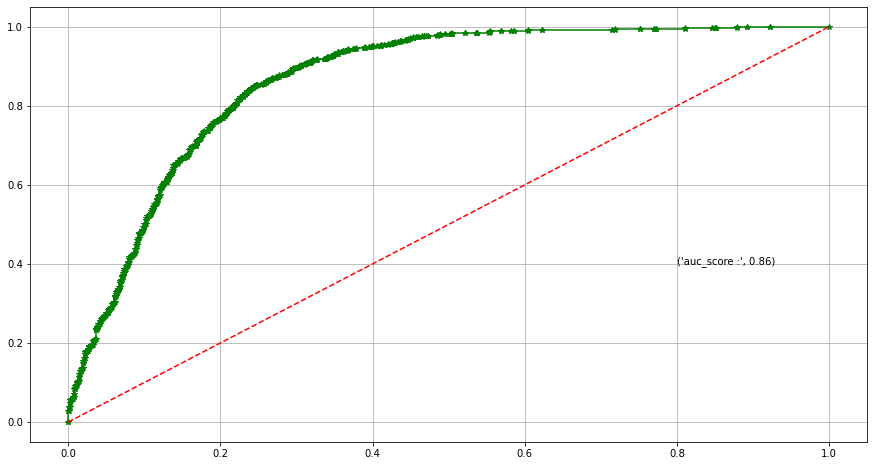

In [615]:
roc_test(y_test,y_pred_prob_test[:,1])

# Model Performance :-

In [616]:
a = pd.DataFrame()
a['models'] = ['Logistic','Decision Tree','Random Forest','AdaBoost','Gboost','Xgboost','KNN','Naive-Bayes']
a['Accuracy'] = [0.83,0.82,0.79,0.83,0.88,0.88,0.89,0.80]
a['Auc_Score']= [0.92,0.87,0.88,0.9,0.94,0.94,0.95,0.86]
a.sort_values(['Accuracy','Auc_Score'],ascending=False)

,models,Accuracy,Auc_Score
6,KNN,0.89,0.95
4,Gboost,0.88,0.94
5,Xgboost,0.88,0.94
0,Logistic,0.83,0.92
3,AdaBoost,0.83,0.90
1,Decision Tree,0.82,0.87
7,Naive-Bayes,0.80,0.86
2,Random Forest,0.79,0.88


In [617]:
# From the above summary data, it can be inferred that KNN model have highest accuracy (0.89) as well as highest AUC score (0.89).
# We can use the KNN model for stroke prediction.